In [125]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import datetime
import os
import pandas as pd
import scipy.stats as stt

%matplotlib inline

In [126]:
# детрендинг методом скользящего среднего. degree - окно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

In [127]:
data = np.load('TEC_np.npy')
NP_TEC = data[7:-7,:,:]
n_lat = len(NP_TEC[:,0,0])
n_long = len(NP_TEC[0,:,0])
#n_day = len(NP_TEC[0,0,:])
n_day = 28
print(n_lat, n_long)

(57, 73)


In [128]:
TEC_detrended = np.zeros(n_lat*(n_long-10)*n_day).reshape(n_lat, (n_long-10), n_day)
data_TEC = np.zeros(n_long)
for day in range(n_day):
    for lat in range(n_lat):
        data_TEC = NP_TEC[lat,:,day+32]
        Det_TEC = np.asarray(detrendS(data_TEC,5))
        Det_TEC_data = Det_TEC[5:-5]
        X = np.arange( 25, 340, 5)
        TEC_detrended[lat, :, day] = Det_TEC_data

In [129]:
dn_long = len(TEC_detrended[0,:,0])

In [130]:
M = np.zeros(n_day)
nm = (np.sum(TEC_detrended[50,52,:]**2)+np.sum(TEC_detrended[0,45,:]**2))*0.5
# корреляционная функция
M = np.correlate(TEC_detrended[50,52,:], TEC_detrended[0,45,:], 'full')/nm
# используем только 2ю половину
M = M[int(len(M)/2):]

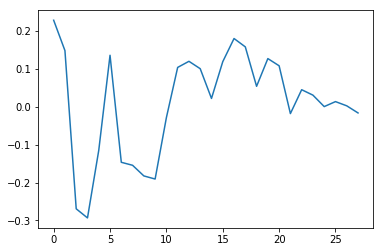

In [131]:
plt.plot(M)

In [132]:
NumPearson  = np.corrcoef(TEC_detrended[50,52,:], TEC_detrended[0,45,:])[1,0]
SciPearson = stt.pearsonr(TEC_detrended[50,52,:], TEC_detrended[0,45,:])[0]
SciSpearman = stt.spearmanr(TEC_detrended[50,52,:], TEC_detrended[0,45,:])[0]

In [133]:
print('Pearson NumPy:', NumPearson, 'Spearman SciPy:', SciSpearman,'Spearman NumPy:', SciPearson)

('Pearson NumPy:', 0.26349739123094135, 'Spearman SciPy:', 0.22933771209633277, 'Spearman NumPy:', 0.2634973912309414)


In [139]:
ScSpmn = np.zeros(27*dn_long).reshape(27,dn_long)
ScPrsn = np.zeros(27*dn_long).reshape(27,dn_long)
for lat in range(0,27):
    for long in range(dn_long):
        ScPrsn[lat,long] = stt.pearsonr(TEC_detrended[26-lat,long,:], TEC_detrended[30+lat,long,:])[0]
        ScSpmn[lat,long] = stt.spearmanr(TEC_detrended[26-lat,long,:], TEC_detrended[30+lat,long,:])[0]

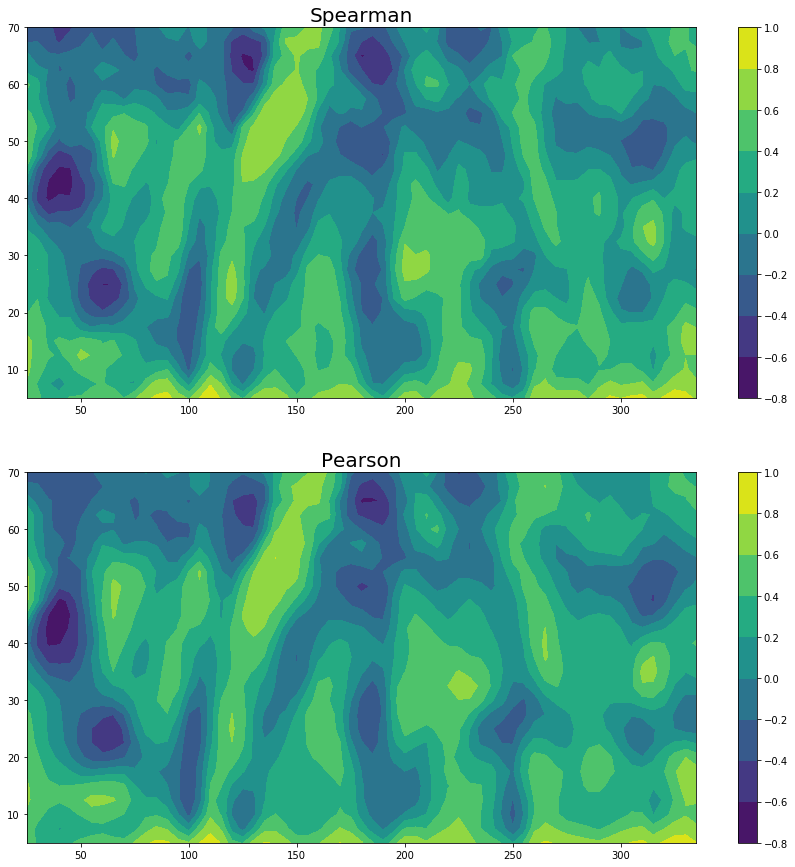

In [141]:
#print(ScPrsn)
X = np.arange( 25, 340, 5)
Y = np.arange(5, 72.5, 2.5)

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15,15))

a = ax1.contourf(X, Y, ScSpmn)
ax1.set_title('Spearman', size = 20)
fig.colorbar(a, ax=ax1)

b = ax2.contourf(X, Y, ScPrsn)
ax2.set_title('Pearson',size = 20)
fig.colorbar(b, ax=ax2)